<a href="https://colab.research.google.com/github/z-arabi/Machine-Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/z-arabi/Machine-Learning.git
%cd "Machine-Learning"

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 76 (delta 30), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (76/76), done.
/content/Machine-Learning


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [3]:
df = pd.read_csv('Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

y = X[:, -1]
X = X[:, :-1]

In [5]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [6]:
'''
the parameters > criterion > gini, entropy > gini is quicker because it removes the log
splitter > where to split the tree > best or random > in some cases random is better
max_depth
min_samples_split
'''
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('max depth : ', clf.tree_.max_depth)
print('train accuracy : ', clf.score(X_train, y_train))
print('test accuracy : ', clf.score(X_test, y_test))

max depth :  11
train accuracy :  0.996875
test accuracy :  0.8125


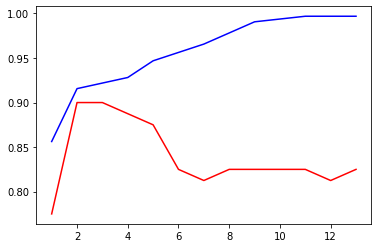

In [7]:
train_scores = []
test_scores = []
for d in range(1, 14):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(np.arange(1, 14, 1), np.array(train_scores), 'b-')
plt.plot(np.arange(1, 14, 1), np.array(test_scores), 'r-')

In [8]:
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X_train, y_train)
print('max depth : ', clf.tree_.max_depth)
print('train accuracy : ', clf.score(X_train, y_train))
print('test accuracy : ', clf.score(X_test, y_test))

# for finding the best depth > it recommended to train with k fold cross validation too

max depth :  2
train accuracy :  0.915625
test accuracy :  0.9


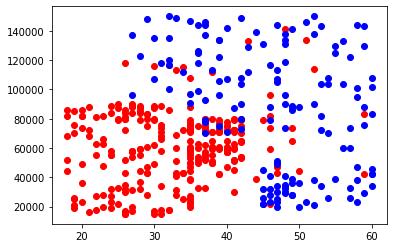

In [10]:
plt.plot(X[y==0, 1], X[y==0,2] , "ro") 
plt.plot(X[y==1, 1], X[y==1,2] , "bo") 

# it is separable with two broken lines

# Visualization

In [11]:
from sklearn.tree import export_text

In [12]:
print(export_text(clf,
                  feature_names=['Gender', 'Age', 'EstimatedSalary']))
# age is repeated two times

|--- Age <= 42.50
|   |--- EstimatedSalary <= 89500.00
|   |   |--- class: 0
|   |--- EstimatedSalary >  89500.00
|   |   |--- class: 1
|--- Age >  42.50
|   |--- Age <= 52.50
|   |   |--- class: 1
|   |--- Age >  52.50
|   |   |--- class: 1



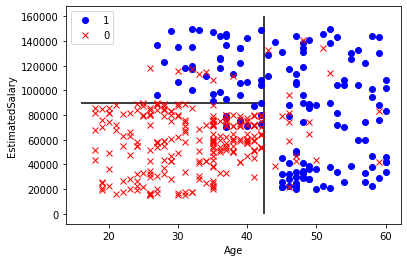

In [ ]:
plt.plot(df[df['Purchased'] == 1]['Age'],
         df[df['Purchased'] == 1]['EstimatedSalary'], 'bo', label='1')

plt.plot(df[df['Purchased'] == 0]['Age'],
         df[df['Purchased'] == 0]['EstimatedSalary'], 'rx', label='0')

plt.vlines(42.5, 0, 160000)
plt.hlines(89500, 16, 42.5)

plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()

In [13]:
from sklearn.tree import export_graphviz

In [14]:
# output format > .dot
# class_names > value list in each node > #False , #True
# class 0 > not perchased > false
export_graphviz(clf,
                out_file='DT.dot',
                feature_names=['Gender', 'Age', 'EstimatedSalary'],
                filled=True, class_names=['False', 'True'])

In [15]:
!dot -Tpng DT.dot -o DT.png